In [3]:
import torch
import einops
import matplotlib.pyplot as plt

In [38]:
d_PGM = torch.load('PGM_shape_size_color_normalized.pt') 

def render_attribute_tsr(attr_tsr, offset=5, clip=True): 
    """attr_tsr: (3, n_row, n_col)"""
    # inputs = -0.6891*torch.ones((3, 120 + 2*offset, 120 + 2*offset))
    inputs = -0.6891*torch.ones((attr_tsr.shape[1] * 40 + 2*offset, attr_tsr.shape[2] * 40 + 2*offset))
    for i_x in range(attr_tsr.shape[1]): 
        for i_y in range(attr_tsr.shape[2]): 
            if attr_tsr[0, i_x, i_y] != -1: 
                i_shape, i_size, i_color = attr_tsr[:, i_x, i_y]
                x0, y0 = i_x * 40 + offset, i_y * 40 + offset
                if clip:
                    i_shape = min(7 - 1, i_shape)
                    i_size = min(10 - 1, i_size)
                    i_color = min(10 - 1, i_color)
                inputs[x0:(x0+40), y0:(y0+40)] = d_PGM[int(i_shape), int(i_size), int(i_color)]
    return inputs 


### Training samples

In [39]:
train_inputs = torch.load('train_inputs.pt') # [35, 10000, 3, 9, 3]
print(train_inputs.shape)

torch.Size([35, 10000, 3, 9, 3])


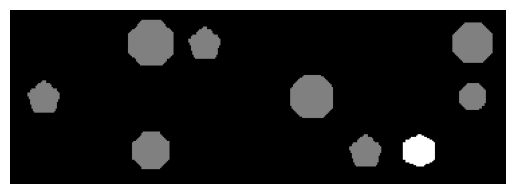

In [40]:
mtg = render_attribute_tsr(einops.rearrange(train_inputs[1, 3, :, :, :], 
                                            'p (h w) attr -> attr h (w p)', h=3,w=3,p=3))
plt.imshow(mtg, cmap='gray')
plt.axis('off')
plt.show()

In [43]:
sample_dir = "/n/home12/binxuwang/Github/mini_edm/exps/base_RAVEN10_abstract_onehot_20240201-0147/samples"
epoch = 99999
samples = torch.load(f"{sample_dir}/tensor_{epoch}.pt")

### Abstract Attribute Onehot model

In [44]:
def onehot2attr_tsr(samples, dim=10):
    attr0_onehot, attr0 = samples[:,  0:7].max(dim=1)
    attr0[attr0_onehot < 0.4] = -1
    attr1_onehot, attr1 = samples[:,  7:17].max(dim=1)
    attr1[attr1_onehot < 0.4] = -1
    attr2_onehot, attr2 = samples[:, 17:27].max(dim=1)
    attr2[attr2_onehot < 0.4] = -1
    attr_tsr = torch.stack((attr0, attr1, attr2), dim=1)
    return attr_tsr

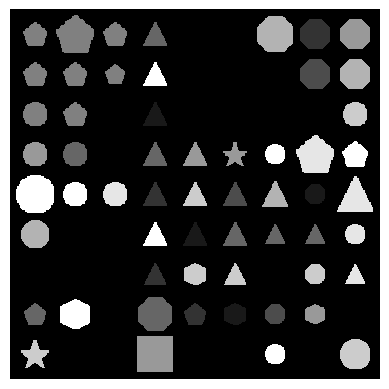

tensor([[[ 3,  3,  3,  1, -1, -1,  5,  5,  5],
         [ 3,  3,  3,  1, -1, -1, -1,  5,  5],
         [ 0,  3, -1,  1, -1, -1, -1, -1,  0],
         [ 0,  0, -1,  1,  1,  6,  0,  3,  3],
         [ 0,  0,  0,  1,  1,  1,  1,  5,  1],
         [ 0, -1, -1,  1,  1,  1,  1,  1,  0],
         [-1, -1, -1,  1,  4,  1, -1,  5,  1],
         [ 3,  4, -1,  5,  3,  4,  5,  4, -1],
         [ 6, -1, -1,  2, -1, -1,  0, -1,  0]],

        [[ 2, -1,  2,  2, -1, -1,  8,  5,  5],
         [ 2,  2,  0,  2, -1, -1, -1,  5,  5],
         [ 2,  2, -1,  2, -1, -1, -1, -1,  2],
         [ 2,  2, -1,  2,  2,  2,  0, -1,  3],
         [-1,  2,  2,  2,  2,  2,  3,  0,  8],
         [ 4, -1,  7,  2,  2,  2,  0,  0,  0],
         [-1, -1, -1,  1,  1,  1, -1,  0,  0],
         [ 1,  5, -1,  7,  1,  1,  0,  0, -1],
         [ 4, -1, -1,  8, -1, -1,  0, -1,  5]],

        [[ 4,  4,  4,  3, -1, -1,  6,  1,  5],
         [ 4,  4,  4,  9, -1, -1, -1,  2,  6],
         [ 4,  4, -1,  0, -1, -1, -1, -1,  7],
         

In [45]:
sample_dir = "/n/home12/binxuwang/Github/mini_edm/exps/base_RAVEN10_abstract_onehot_20240201-0147/samples"
epoch = 99999
samples = torch.load(f"{sample_dir}/tensor_{epoch}.pt")
attr_tsr = onehot2attr_tsr(samples)[2]
mtg = render_attribute_tsr(attr_tsr, clip=True)
plt.imshow(mtg, cmap='gray')
plt.axis('off')
plt.show()
print(attr_tsr)

In [34]:
samples.shape

torch.Size([25, 27, 9, 9])

### Abstract Attribute Feature model

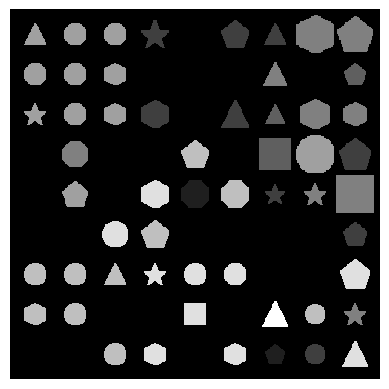

tensor([[[ 1,  5,  5,  6, -1,  3,  1,  4,  3],
         [ 5,  5,  4, -1, -1, -1,  1, -1,  3],
         [ 6,  5,  4,  4, -1,  1,  1,  4,  4],
         [-1,  5, -1, -1,  3, -1,  2,  0,  3],
         [-1,  3, -1,  4,  5,  5,  6,  6,  2],
         [-1, -1,  0,  3, -1, -1, -1, -1,  3],
         [ 0,  0,  1,  6,  0,  5, -1, -1,  3],
         [ 4,  0, -1, -1,  2, -1,  1,  0,  6],
         [-1, -1,  0,  4, -1,  4,  3,  0,  1]],

        [[ 1,  1,  1,  4, -1,  4,  1,  9,  8],
         [ 1,  1,  1, -1, -1, -1,  2, -1,  1],
         [ 1,  1,  1,  4, -1,  4,  0,  5,  2],
         [-1,  3, -1, -1,  4, -1,  6,  9,  6],
         [-1,  3, -1,  4,  4,  4,  0,  1,  9],
         [-1, -1,  3,  4, -1, -1, -1, -1,  2],
         [ 1,  1,  1,  1,  1,  1, -1, -1,  5],
         [ 1,  1, -1, -1,  1, -1,  3,  0,  1],
         [-1, -1,  1,  1, -1,  1,  0,  0,  3]],

        [[ 4,  4,  4,  1, -1,  1,  1,  3,  3],
         [ 4,  4,  4, -1, -1, -1,  3, -1,  2],
         [ 4,  4,  4,  1, -1,  1,  2,  3,  3],
         

In [ ]:
sample_dir = "/n/home12/binxuwang/Github/mini_edm/exps/base_RAVEN10_20240201-0036/samples"
epoch = 99999
samples = torch.load(f"{sample_dir}/tensor_{epoch}.pt")
attr_tsr = samples[1].round().int()
mtg = render_attribute_tsr(attr_tsr, clip=True)
plt.imshow(mtg, cmap='gray')
plt.axis('off')
plt.show()
print(attr_tsr)